/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Descriptive Statistics for Movie Durations:
 count    5271.000000
mean       99.806109
std        28.114978
min         3.000000
25%        87.000000
50%        98.000000
75%       115.000000
max       253.000000
Name: duration_min, dtype: float64

Descriptive Statistics for TV Show Durations:
 count     560.000000
mean     2023.928571
std      1241.932360
min      1200.000000
25%      1200.000000
50%      1800.000000
75%      2400.000000
max      9600.000000
Name: duration_min, dtype: float64


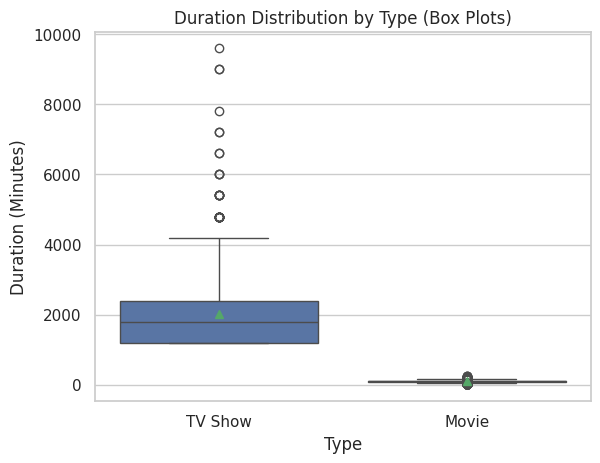

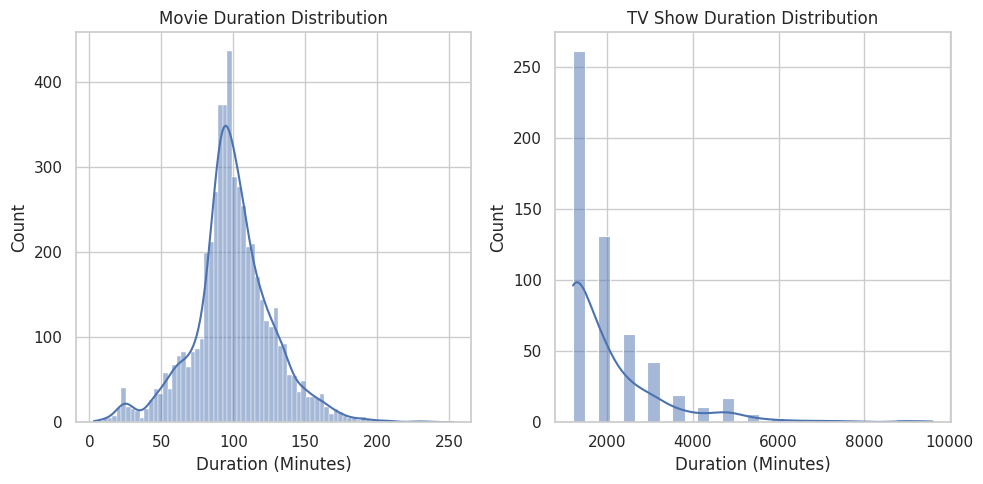

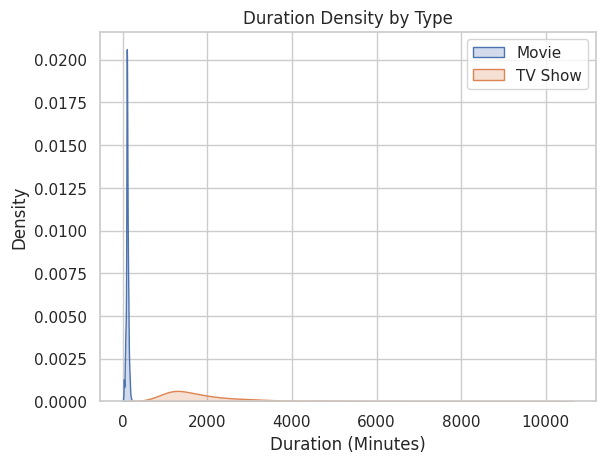

In [ ]:
# 1. Data Preprocessing: Extract numerical duration and convert to numeric

# Extract numerical part and unit from `duration`
df[['duration_num', 'duration_unit']] = df['duration'].str.split(' ', expand=True)

# Convert `duration_num` to numeric (handle non-numeric values)
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

# 2. Convert Seasons to Minutes (Assuming 1 Season = 10 hours = 600 minutes)
df.loc[df['duration_unit'] == 'Seasons', 'duration_min'] = df['duration_num'] * 600
df.loc[df['duration_unit'] == 'min', 'duration_min'] = df['duration_num']

# 3. Descriptive Statistics by Type

# Calculate summary statistics for Movies and TV Shows separately
movie_duration_stats = df[df['type'] == 'Movie']['duration_min'].describe()
tv_show_duration_stats = df[df['type'] == 'TV Show']['duration_min'].describe()

print("\nDescriptive Statistics for Movie Durations:\n", movie_duration_stats)
print("\nDescriptive Statistics for TV Show Durations:\n", tv_show_duration_stats)

# 4. Visualizations

# Side-by-side Box Plots
sns.boxplot(x='type', y='duration_min', data=df, showmeans=True)
plt.title('Duration Distribution by Type (Box Plots)')
plt.xlabel('Type')
plt.ylabel('Duration (Minutes)')
plt.show()

# Histograms (Separate)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['type'] == 'Movie']['duration_min'], kde=True)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df[df['type'] == 'TV Show']['duration_min'], kde=True)
plt.title('TV Show Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Density Plots (Overlay)
sns.kdeplot(df[df['type'] == 'Movie']['duration_min'], label='Movie', shade=True)
sns.kdeplot(df[df['type'] == 'TV Show']['duration_min'], label='TV Show', shade=True)
plt.title('Duration Density by Type')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Descriptive Statistics by Genre:
                                                     count         mean  \
listed_in                                                                
Action & Adventure                                   98.0   105.010204   
Action & Adventure, Anime Features, Children & ...    3.0   102.666667   
Action & Adventure, Anime Features, Classic Movies    1.0   100.000000   
Action & Adventure, Anime Features, Horror Movies     1.0    96.000000   
Action & Adventure, Anime Features, Internation...   28.0    85.964286   
...                                                   ...          ...   
TV Horror, TV Mysteries, TV Thrillers                 4.0  2700.000000   
TV Horror, Teen TV Shows                              0.0          NaN   
TV Sci-Fi & Fantasy, TV Thrillers                     1.0  1800.000000   
TV Shows                                              0.0          NaN   
Thrillers                                            49.0    97.244898   

  

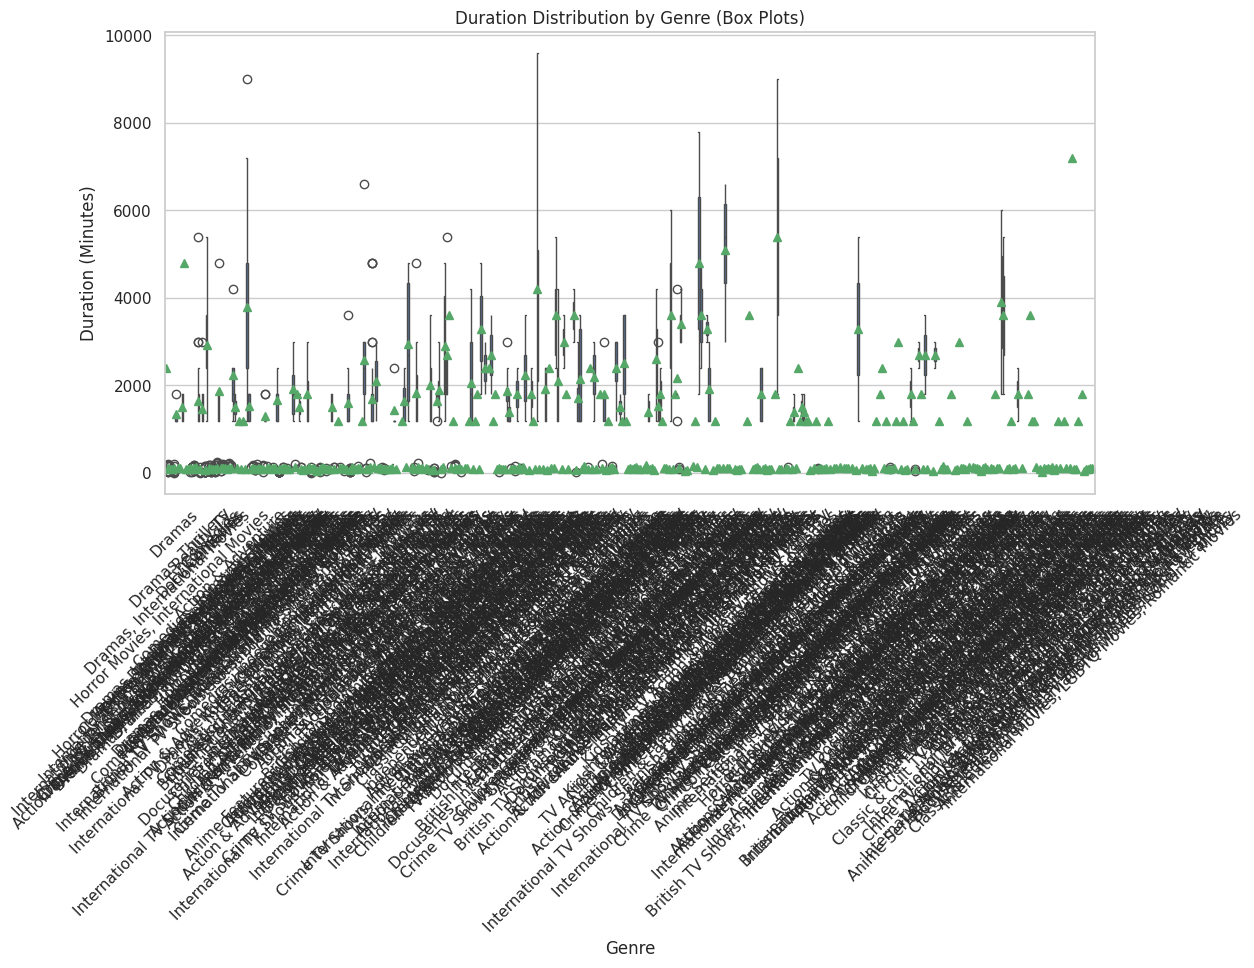

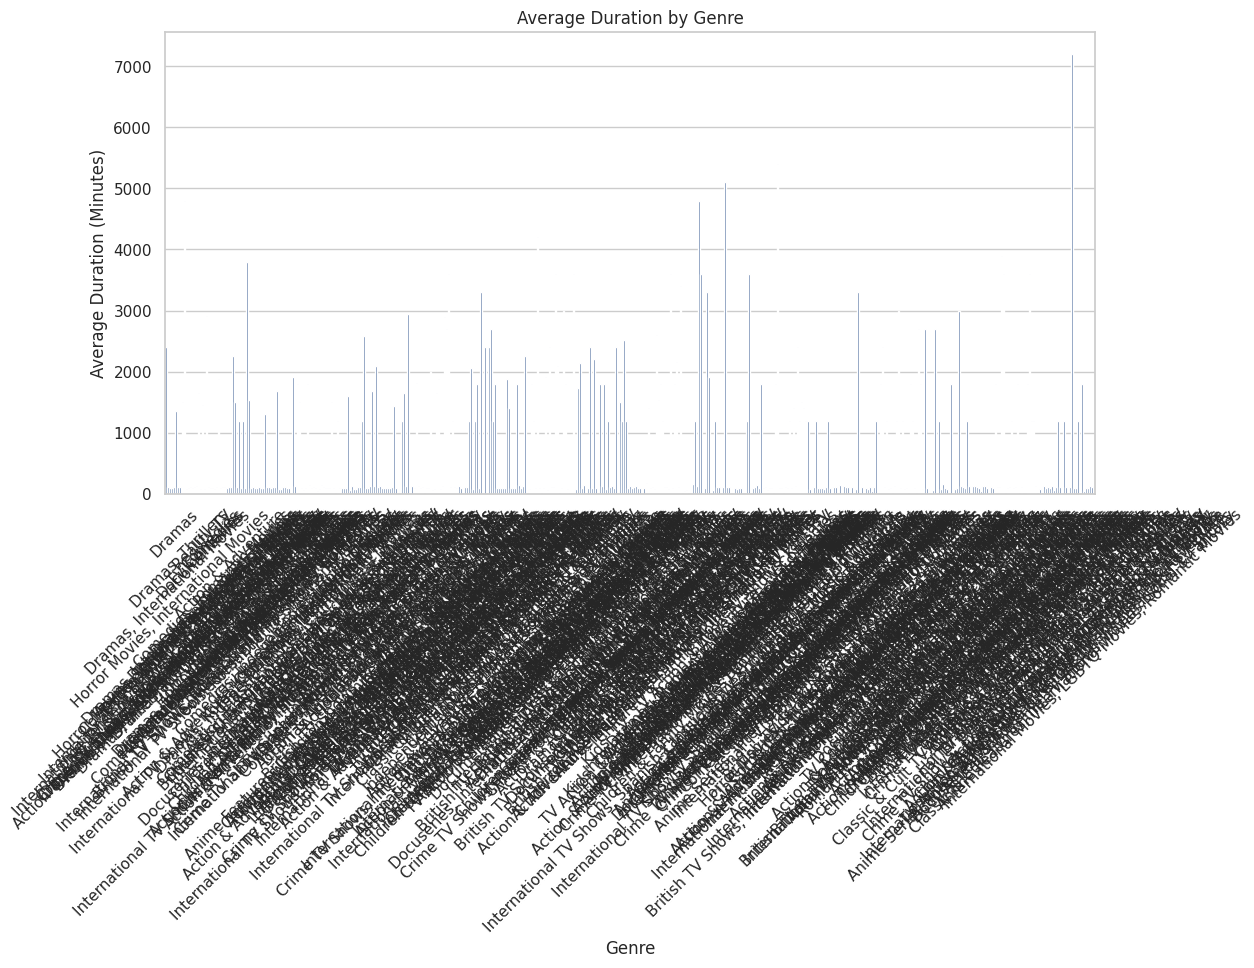

In [ ]:
# 1. Data Preprocessing: Handle multiple genres in 'listed_in'

# Explode 'listed_in' to have one genre per row
df_exploded = df.explode('listed_in')

# 2. Descriptive Statistics by Genre

# Calculate summary statistics for each genre
genre_duration_stats = df_exploded.groupby('listed_in')['duration_min'].describe()

# Print the summary statistics
print("\nDescriptive Statistics by Genre:\n", genre_duration_stats)

# 3. Visualizations

# Grouped Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='listed_in', y='duration_min', data=df_exploded, showmeans=True)
plt.title('Duration Distribution by Genre (Box Plots)')
plt.xlabel('Genre')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

# Bar Chart of Average Durations
plt.figure(figsize=(12, 6))
sns.barplot(x='listed_in', y='duration_min', data=df_exploded, ci=None)  # ci=None removes error bars
plt.title('Average Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Descriptive Statistics by Rating:
            count        mean          std   min     25%    50%      75%  \
rating                                                                    
G           39.0   88.076923    25.699052   9.0   78.00   84.0    96.00   
NC-17        3.0  125.000000    49.789557  83.0   97.50  112.0   146.00   
NR          80.0  213.150000   880.039068  44.0   84.75   93.0   108.50   
PG         246.0   98.536585    17.634980  13.0   90.00   95.0   105.00   
PG-13      386.0  107.748705    19.534626   8.0   95.00  104.0   118.00   
R          661.0  106.431165    18.357812  62.0   94.00  103.0   116.00   
TV-14     1393.0  349.171572   876.328606   5.0   94.00  113.0   139.00   
TV-G       128.0  385.835938   788.338737  10.0   62.25   87.0   109.25   
TV-MA     2038.0  299.460255   672.631000  12.0   85.00   98.0   117.00   
TV-PG      544.0  278.011029   635.517075  12.0   81.75   98.0   127.00   
TV-Y       160.0  587.056250   922.290056   3.0   29.50   72.0  

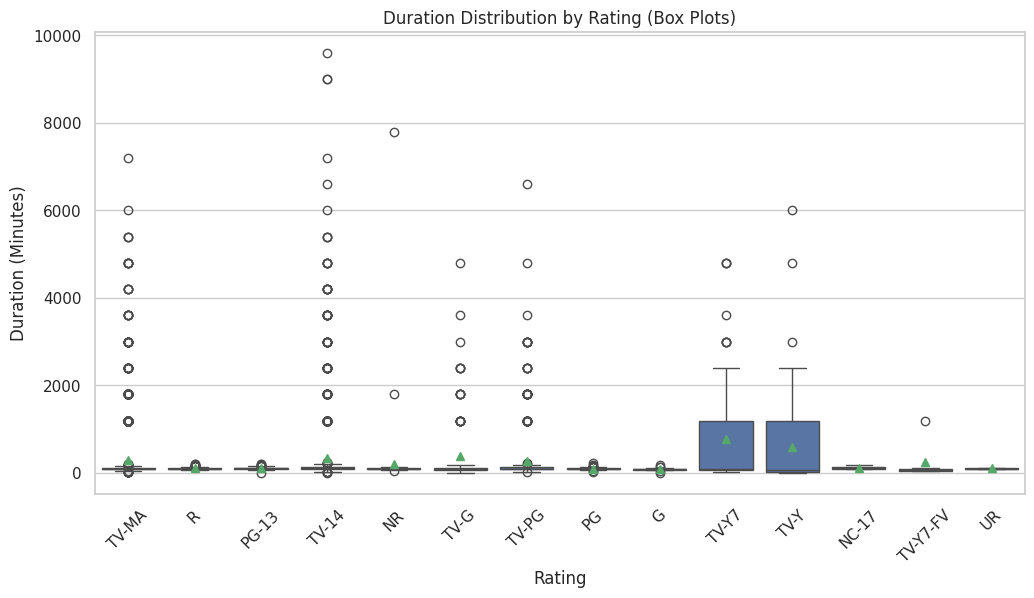

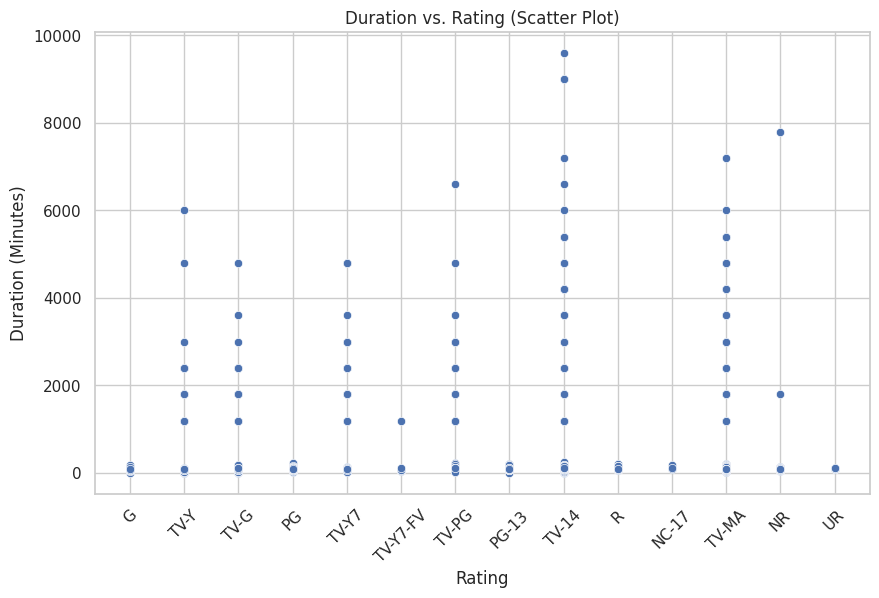

In [ ]:
# 1. Descriptive Statistics by Rating

# Calculate summary statistics for each rating category
rating_duration_stats = df.groupby('rating')['duration_min'].describe()

# Print the summary statistics
print("\nDescriptive Statistics by Rating:\n", rating_duration_stats)

# 2. Visualizations

# Grouped Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_min', data=df, showmeans=True)
plt.title('Duration Distribution by Rating (Box Plots)')
plt.xlabel('Rating')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

# 3. Scatter Plot (if `rating` is ordinal)

# Define an ordinal mapping for rating categories (adjust as needed)
rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA', 'NR', 'UR']

# Convert `rating` to ordered categorical
df['rating'] = pd.Categorical(df['rating'], categories=rating_order, ordered=True)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='duration_min', data=df)
plt.title('Duration vs. Rating (Scatter Plot)')
plt.xlabel('Rating')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


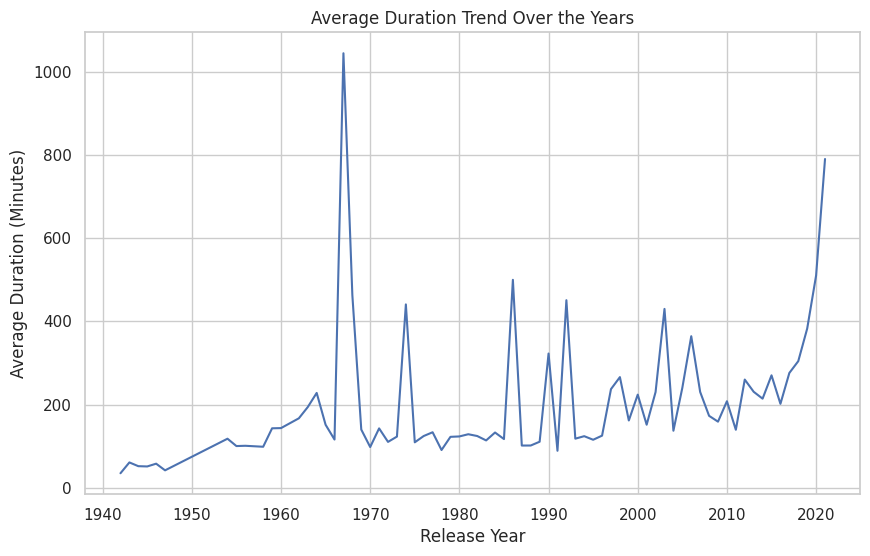

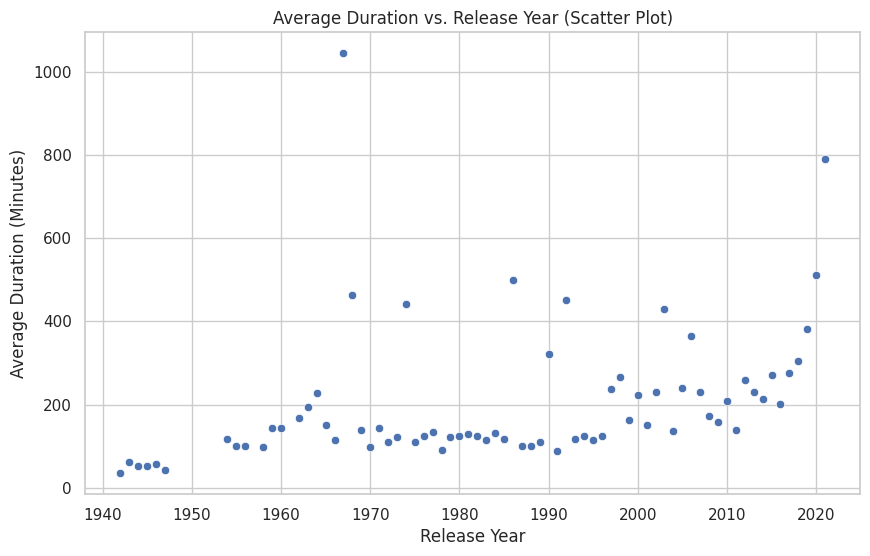


Correlation between Release Year and Duration: 0.06790592256852955
P-value: 2.1001992566969788e-07


In [ ]:
# 1. Calculate Average/Median Duration by Release Year

# Calculate average duration per release year
avg_duration_by_year = df.groupby('release_year')['duration_min'].mean().reset_index()

# Calculate median duration per release year (optional)
median_duration_by_year = df.groupby('release_year')['duration_min'].median().reset_index()

# 2. Visualizations

# Line Chart (Average Duration)
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='duration_min', data=avg_duration_by_year)
plt.title('Average Duration Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

# Scatter Plot (Average Duration) - Optional
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_min', data=avg_duration_by_year)
plt.title('Average Duration vs. Release Year (Scatter Plot)')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

# Calculate correlation between 'release_year' and 'duration_min'
# Ensure both columns have the same length after handling NaN values

# Drop rows with NaN values in 'duration_min' for both columns
df_cleaned = df.dropna(subset=['duration_min'])

correlation, p_value = pearsonr(df_cleaned['release_year'], df_cleaned['duration_min'])

print("\nCorrelation between Release Year and Duration:", correlation)
print("P-value:", p_value)

In [ ]:
# 1. Check Data Type
print(df['listed_in'].dtype)

# 2. Inspect Unique Values (First few for overview)
print("\nSample Unique Values in 'listed_in':")
print(df['listed_in'].unique()[:5])  # Display first 5 unique values

# 3. Check for Null Values
print("\nNumber of Null Values:", df['listed_in'].isnull().sum())

# 4. Frequency Counts (Top Genres)

# Split comma-separated genres and count occurrences
all_genres = ','.join(df['listed_in']).split(',')
genre_counts = pd.Series(all_genres).value_counts()

print("\nTop Genres:\n", genre_counts.head(10))  # Display top 10 genres

object

Sample Unique Values in 'listed_in':
['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas']

Number of Null Values: 0

Top Genres:
  International Movies       2287
Dramas                      1379
Comedies                    1068
 Dramas                      719
Action & Adventure           718
Documentaries                697
 Independent Movies          653
 Romantic Movies             524
International TV Shows       484
Children & Family Movies     484
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 1. Handle Multiple Genres (Explode into Separate Rows)

# Explode 'listed_in' to have one genre per row
df_exploded = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# 2. Standardize Genre Names (Example: Replace "Sci-Fi" with "Science Fiction")

# Create a dictionary for genre name replacements (add more as needed)
genre_replacements = {'Sci-Fi': 'Science Fiction'}

# Replace genre names using the dictionary
df_exploded['listed_in'] = df_exploded['listed_in'].replace(genre_replacements)

# 3. Handle Missing Values (Impute with "Unknown")

# Fill null values with "Unknown"
df_exploded['listed_in'] = df_exploded['listed_in'].fillna('Unknown')

# Display the first few rows of the cleaned DataFrame
print(df_exploded.head().to_string(index=False))

show_id    type title          director                                                                                                                                                                       cast country date_added  release_year rating  duration              listed_in                                                                                                                                          description  year_added                                                   genres  title_length processed_title  num_words words  sentiment                                              Genres_List  Duration  cast_size  duration_minutes  duration_num duration_unit  duration_min
     s1 TV Show    3%   Kirsten Johnson João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi  Brazil 2020-08-14          2020  TV-MA 4 Seasons International TV Shows             In a f

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


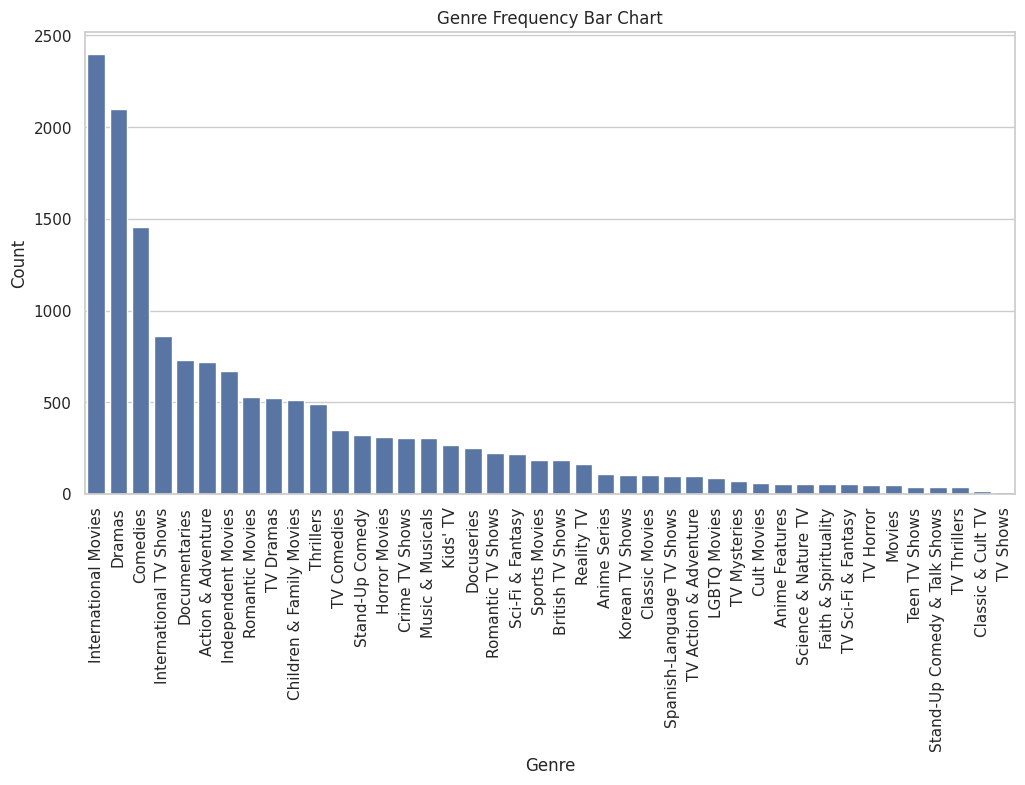

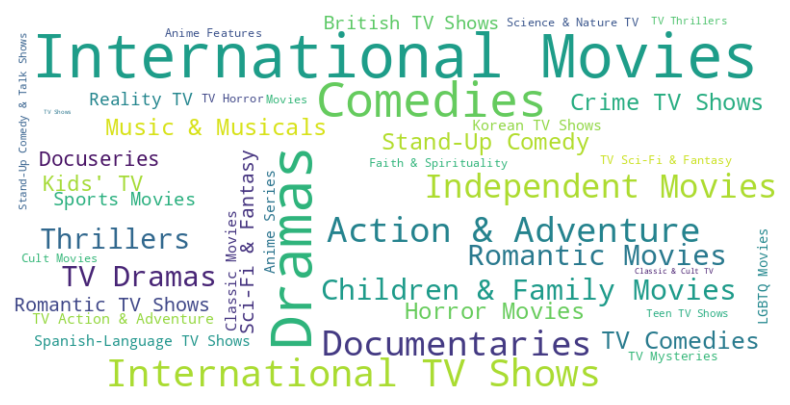


Frequent Itemsets (Co-occurring Genres):

     support                                           itemsets
0   0.103028                               (Action & Adventure)
1   0.026403                                 (British TV Shows)
2   0.073755                         (Children & Family Movies)
3   0.209212                                         (Comedies)
4   0.044196                                   (Crime TV Shows)
5   0.104750                                    (Documentaries)
6   0.036017                                       (Docuseries)
7   0.301047                                           (Dramas)
8   0.044770                                    (Horror Movies)
9   0.096571                               (Independent Movies)
10  0.344239                             (International Movies)
11  0.123404                           (International TV Shows)
12  0.038456                                         (Kids' TV)
13  0.044196                                 (Music & Musical

In [ ]:
# 1. Bar Chart of Genre Frequencies

# Count genre occurrences
genre_counts = df_exploded['listed_in'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Frequency Bar Chart')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 2. Word Cloud of Genres

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. Genre Co-occurrence

# Prepare data for co-occurrence analysis
genre_lists = df['listed_in'].str.split(', ').tolist()

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(genre_lists).transform(genre_lists)
df_genres = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_genres, min_support=0.02, use_colnames=True)  # Adjust min_support as needed

# Print frequent itemsets (co-occurring genres)
print("\nFrequent Itemsets (Co-occurring Genres):\n")
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


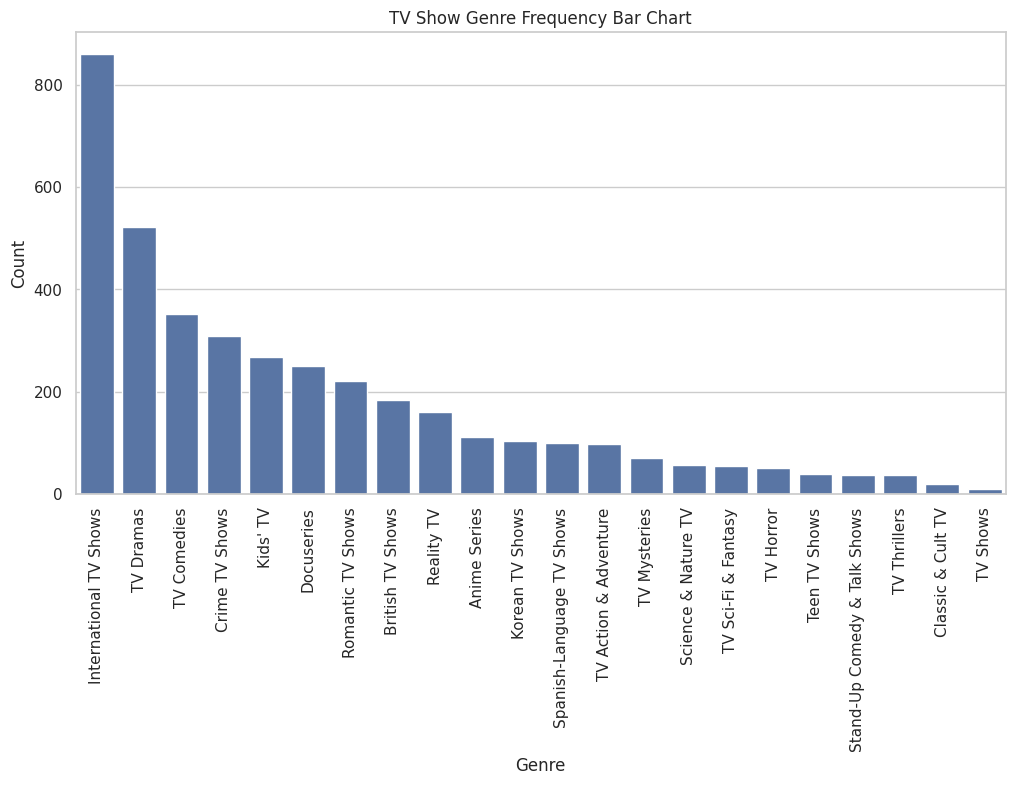

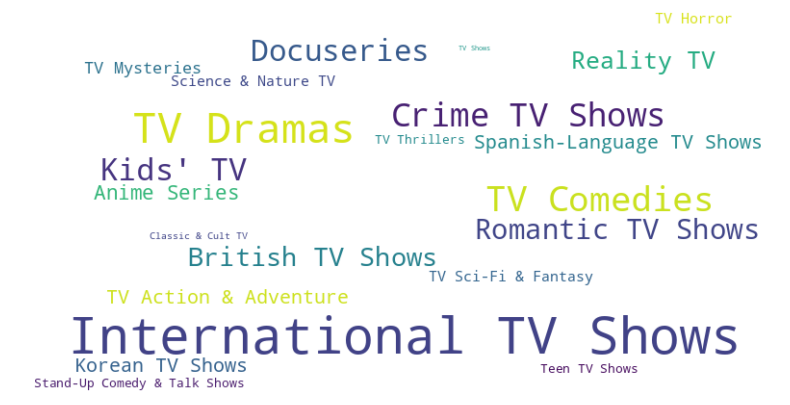


Frequent Itemsets (Co-occurring Genres) for TV Shows:

     support                                           itemsets
0   0.065371                                     (Anime Series)
1   0.108363                                 (British TV Shows)
2   0.181390                                   (Crime TV Shows)
3   0.147821                                       (Docuseries)
4   0.506478                           (International TV Shows)
5   0.157833                                         (Kids' TV)
6   0.061249                                  (Korean TV Shows)
7   0.094817                                       (Reality TV)
8   0.130153                                (Romantic TV Shows)
9   0.033569                              (Science & Nature TV)
10  0.058304                        (Spanish-Language TV Shows)
11  0.022379                     (Stand-Up Comedy & Talk Shows)
12  0.057715                            (TV Action & Adventure)
13  0.206714                                    

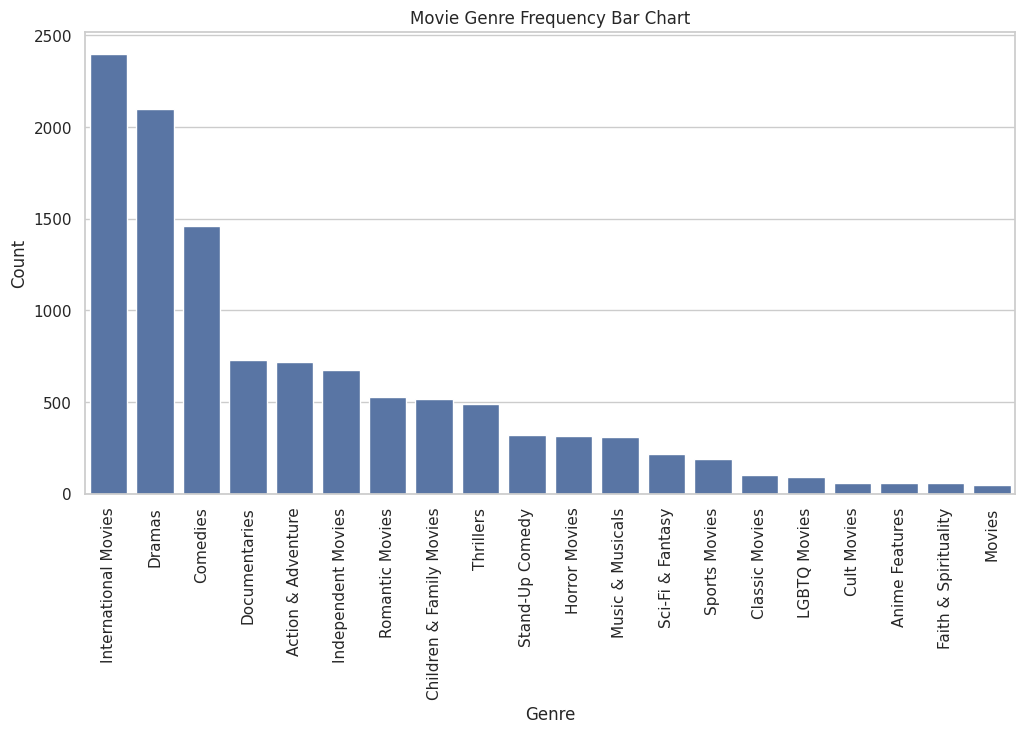

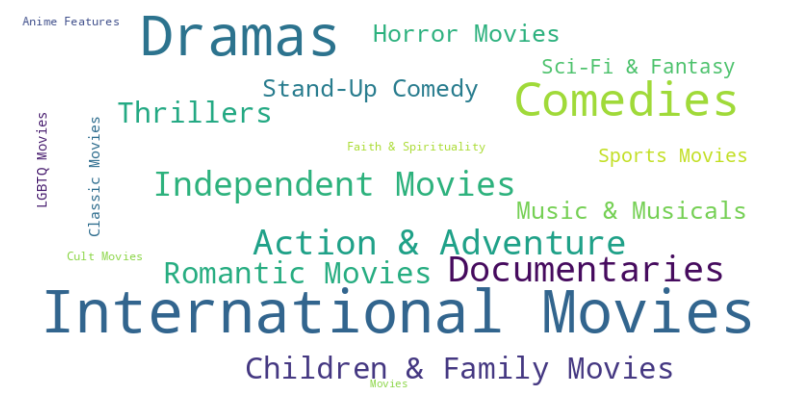


Frequent Itemsets (Co-occurring Genres) for Movies:

     support                                           itemsets
0   0.136217                               (Action & Adventure)
1   0.097515                         (Children & Family Movies)
2   0.276608                                         (Comedies)
3   0.138494                                    (Documentaries)
4   0.398027                                           (Dramas)
5   0.059192                                    (Horror Movies)
6   0.127680                               (Independent Movies)
7   0.455132                             (International Movies)
8   0.058433                                 (Music & Musicals)
9   0.099981                                  (Romantic Movies)
10  0.041169                                 (Sci-Fi & Fantasy)
11  0.035667                                    (Sports Movies)
12  0.060710                                  (Stand-Up Comedy)
13  0.092961                                      

In [ ]:
# --- For TV Shows ---

# Filter data for TV Shows
df_tv_shows = df_exploded[df_exploded['type'] == 'TV Show']

# 1. Bar Chart of Genre Frequencies (TV Shows)

# Count genre occurrences for TV Shows
genre_counts_tv = df_tv_shows['listed_in'].value_counts()

# Plot bar chart for TV Shows
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts_tv.index, y=genre_counts_tv.values)
plt.title('TV Show Genre Frequency Bar Chart')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Adjust rotation as needed
plt.show()

# 2. Word Cloud of Genres (TV Shows)

# Generate word cloud for TV Shows
wordcloud_tv = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts_tv)

# Plot word cloud for TV Shows
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tv, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. Genre Co-occurrence (TV Shows)

# Prepare data for co-occurrence analysis (TV Shows)
tv_show_genre_lists = df[df['type'] == 'TV Show']['listed_in'].str.split(', ').tolist()

# Encode transactions (TV Shows)
te_tv = TransactionEncoder()
te_ary_tv = te_tv.fit(tv_show_genre_lists).transform(tv_show_genre_lists)
df_genres_tv = pd.DataFrame(te_ary_tv, columns=te_tv.columns_)

# Apply Apriori algorithm (TV Shows)
frequent_itemsets_tv = apriori(df_genres_tv, min_support=0.02, use_colnames=True)

# Print frequent itemsets for TV Shows
print("\nFrequent Itemsets (Co-occurring Genres) for TV Shows:\n")
print(frequent_itemsets_tv)

# --- For Movies ---

# Filter data for Movies
df_movies = df_exploded[df_exploded['type'] == 'Movie']

# 1. Bar Chart of Genre Frequencies (Movies)

# Count genre occurrences for Movies
genre_counts_movies = df_movies['listed_in'].value_counts()

# Plot bar chart for Movies
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts_movies.index, y=genre_counts_movies.values)
plt.title('Movie Genre Frequency Bar Chart')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Adjust rotation as needed
plt.show()

# 2. Word Cloud of Genres (Movies)

# Generate word cloud for Movies
wordcloud_movies = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts_movies)

# Plot word cloud for Movies
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. Genre Co-occurrence (Movies)

# Prepare data for co-occurrence analysis (Movies)
movie_genre_lists = df[df['type'] == 'Movie']['listed_in'].str.split(', ').tolist()

# Encode transactions (Movies)
te_movies = TransactionEncoder()
te_ary_movies = te_movies.fit(movie_genre_lists).transform(movie_genre_lists)
df_genres_movies = pd.DataFrame(te_ary_movies, columns=te_movies.columns_)

# Apply Apriori algorithm (Movies)
frequent_itemsets_movies = apriori(df_genres_movies, min_support=0.02, use_colnames=True)

# Print frequent itemsets for Movies
print("\nFrequent Itemsets (Co-occurring Genres) for Movies:\n")
print(frequent_itemsets_movies)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


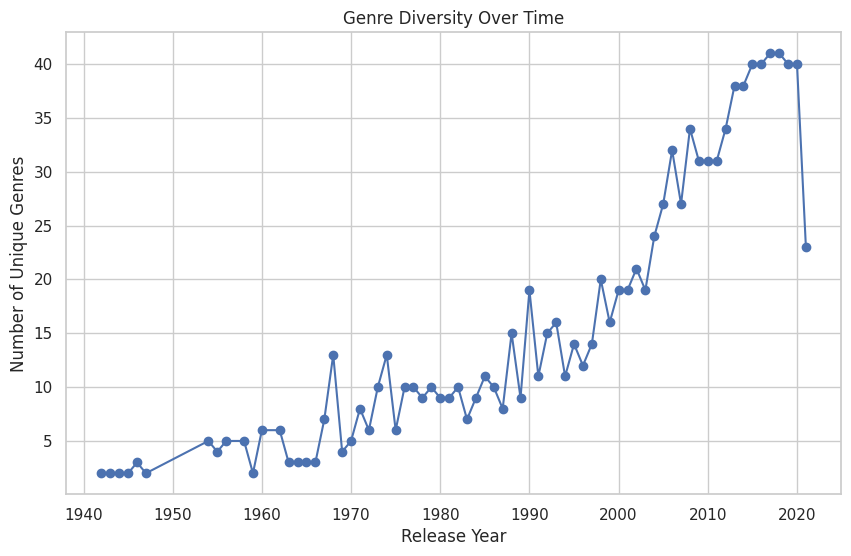

In [ ]:
# Count the number of unique genres per year
genre_diversity = df.groupby('release_year')['genres'].apply(lambda x: x.explode().unique().shape[0]).reset_index(name='num_unique_genres')

# Visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(genre_diversity['release_year'], genre_diversity['num_unique_genres'], marker='o')
plt.title('Genre Diversity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Genres')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1200x800 with 0 Axes>

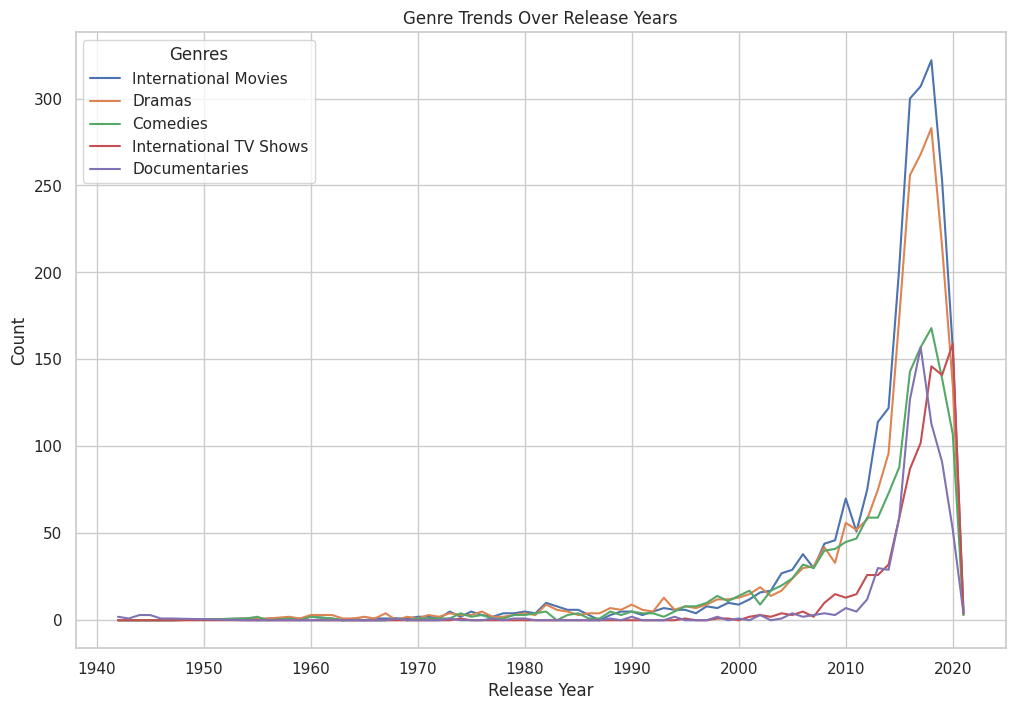

In [ ]:
# Preprocessing: Extract individual genres from 'listed_in'
df['genres'] = df['listed_in'].str.split(', ')
exploded_df = df.explode('genres')

# Group by release year and genre, count occurrences
genre_trends = exploded_df.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Pivot the data for easier visualization
genre_trends_pivot = genre_trends.pivot(index='release_year', columns='genres', values='count').fillna(0)

# Select top N genres to visualize (adjust as needed)
top_genres = genre_trends_pivot.sum().sort_values(ascending=False).head(5).index
genre_trends_top = genre_trends_pivot[top_genres]

# Visualize trends
plt.figure(figsize=(12, 8))
genre_trends_top.plot(figsize=(12, 8))
plt.title('Genre Trends Over Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Genres')
plt.grid(True)
plt.show()

In [ ]:
# Define the columns to keep
columns_to_keep = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

# Drop the columns not in the 'columns_to_keep' list
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df.drop(columns_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Kirsten Johnson,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7833,s7781,Movie,zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7834,s7782,Movie,zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7835,s7783,Movie,zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7836,s7784,Movie,zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
def check_for_nan_null_inf(df, columns):
  """
  Checks for NaN, null (None), and infinite values in specified columns of a DataFrame.

  Args:
    df: The DataFrame to check.
    columns: A list of column names to check.

  Returns:
    A new DataFrame where each row represents a column, and the columns indicate
    whether that column contains NaN, null, or infinite values.
  """
  import numpy as np # import numpy
  results = {}
  for col in columns:
    results[col] = {
        'has_nan': df[col].isna().any(),
        'has_null': df[col].isnull().any(),
        'has_inf': (
            pd.to_numeric(df[col], errors='coerce')
            .isin([np.inf, -np.inf]) # use np.inf instead of pd.np.inf
            .any()
        ),
    }

  return pd.DataFrame(results).transpose()

check_for_nan_null_inf(df, columns=['description', 'title', 'listed_in', 'country', 'rating', 'release_year', 'type'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,has_nan,has_null,has_inf
description,False,False,False
title,False,False,False
listed_in,False,False,False
country,False,False,False
rating,False,False,False
release_year,False,False,False
type,False,False,False
